In [2]:
import numpy as np
import random
import time
import math
import random
import os
import sys
from datetime import datetime

# Notebook path
current_directory = os.getcwd()
# Get one behind for calling the other modules
root_directory = os.path.abspath(os.path.join(current_directory, '..'))
sys.path.append(root_directory)

#Network and measures
from to_get_data.net_construction_vis_measures import *
#Agrobiodiversity
from to_get_data.agrobiodiversity_data import *

from model_class.Variety import Variety
from model_class.UD_clan import *

In [3]:
def histogram_communities(comunidades_lista):
    # Utilizamos np.unique para obtener los valores únicos y sus frecuencias
    valores, conteos = np.unique(comunidades_lista, return_counts=True)

    # Creamos el gráfico de barras con transparencia ajustada
    plt.bar(valores, conteos, color='blue', edgecolor='black', alpha=0.7)

    # Añadimos etiquetas y título
    plt.title('Conteo por Comunidad')
    plt.xlabel('Comunidad')
    plt.ylabel('Conteo')

    # Establecemos los límites del eje x para que solo muestre números enteros
    plt.xticks(np.arange(min(valores), max(valores)+1, 1))

    # Mostramos el gráfico
    plt.show()

# Endogamy

## 1. Beta fixed

In [3]:
#Con la mitad de la media
### Parameters for simulation
iniciais = 40 # Initial UD
prob_morte = 0.06 # Beta from the gutertz equation
media = 6 # Average children per UD
random.seed(42) # Random seed
t = 1000 #steps of the simulation
UD.uds = {}

#### Initialization
## Comunidades
UD.uds = {}
comunidades_disponibles = [i for i in range(1, (int(iniciais) // 10) + 1) for _ in range(10)]
instancias_ud = []
for id_ud in range(1, int(iniciais) + 1):
    instancias_ud.append(UD(id_ud, media, comunidades_disponibles.pop(0)))
## Variedades y repartirlas entre las comunidades
for id_ud, ud in UD.uds.items():
    for _ in range(5):
        ud.varieties.append(Variety())

comunidades_lista = [ud.community for ud in UD.uds.values()]

#histogram_communities(comunidades_lista)
    
#### Simulation
original_media = media
vivas = [int(iniciais)]
for i in range (1, (t)):
    uds_copy = dict(UD.uds) #As UDs existentes no tempo n
    any_ud_active = False # Flag to see if the simulation went to extintion
    alive = uds_copy
    if alive > 200 and (media == original_media): #or media == original_media-1):
        media -= media//2
        if media >= 4:
            media = media //2
        print(media)
    elif alive < 150 and media < original_media:
        media = original_media
        print(media)
    for id_ud, ud in uds_copy.items():
        if ud.activa == True:
            any_ud_active = True
            ud.ter_filho()
            ud.buscar_ud(media, 50, True)
            ud.incrementar_idade()
            ud.death_probability(prob_morte)
    if not any_ud_active:
        print("acabo")
        break
    if i % 250 == 0:
        create_vis_geral(uds_copy, True)
        p_graph(uds_copy, True)
     # Collecting data
    viv = len([ud for id, ud in uds_copy.items() if ud.activa])
    #mort = len([ud for id, ud in uds_copy.items() if not ud.activa])
    vivas.append(viv)
    #mortas.append(mort)
    #tempo.append(t)
    if i%100 == 0:
        print(f"tamos en tiempo {i} con vivas {viv}")
#comunidades_lista = [ud.community for ud in UD.uds.values()]
comunidades_lista = [ud.community for id, ud in uds_copy.items() if ud.activa]
print(len([ud for id, ud in uds_copy.items() if ud.activa]))
histogram_communities(comunidades_lista)
#community_level_agrobiodiversity(UD)

NameError: name 'histogram_communities' is not defined

In [5]:
#This experiment has the beta fixed in 0.06
prob_morte = 0.06
n = 6
m = 60
malphas = np.linspace(1,n,n) # Average number of children: from 1 to n
mbetas = np.linspace(10,m,int(m/10)) # Initial UDs: from 10 to m
mM = np.empty((len(malphas), len(mbetas)), dtype=object)
punto_vista = 2
tiempo = 600
tempo = list(range(0,tiempo,punto_vista))
experiments = 2

# For data of behaviour
datos_1 = np.empty((len(malphas), len(mbetas)), dtype=object)
print(mM.shape)
start = time.time()

for i, media in enumerate(malphas):
    for j, iniciais  in enumerate(mbetas):
        list_alive_UDs = []
        list_vivas_puntos_vista = []
        tasas_crecimiento = []
        star_configuration = time.time()
        original_media = media
        for experiment in range(1, experiments+1):
            #### Initialization
            ## Comunidades
            UD_endogamy.uds = {}
            #comunidades_disponibles = [i for i in range(1, (int(iniciais) // 10) + 1) for _ in range(10)]
            instancias_ud = []
            for id_ud in range(1, int(iniciais) + 1):
                    instancias_ud.append(UD_endogamy(id_ud, media))
            ## Varieties
            limited_varieties = True
            if limited_varieties == False:
                for id_ud, ud in UD_endogamy.uds.items():
                    for _ in range(3):
                        ud.varieties.append(Variety())
            else:
                initial_varieties = [Variety() for _ in range (10)]
                for ud in UD_endogamy.uds.values():
                    for _ in range(3):
                        ud.varieties.append(random.choice(initial_varieties))
            # Lists for graphs
            vivas_puntos_vista = [int(iniciais)]
            vivas_tasa_crecimiento = [int(iniciais)]
            mortas_puntos_vista = [0]
            # Simulation
            for t in range(1, tiempo):
                uds_copy = dict(UD_endogamy.uds)
                any_ud_active = False
                alive = len([1 for id, ud in uds_copy.items() if ud.activa])
                if alive > 200 and (media == original_media): #or media == original_media-1):
                    media -= media//2
                    if media >= 4:
                        media = media //2
                    print(media)
                elif alive < 150 and media < original_media:
                    media = original_media
                    print(media)                
                for id_ud, ud in uds_copy.items():
                    if ud.activa == True:
                        any_ud_active = True
                        ud.ter_filho()
                        ud.buscar_ud(int(media),0)
                        ud.incrementar_idade()
                        ud.death_probability(prob_morte)
                if not any_ud_active:
                    # Only 0
                    print(f"acabó en el experimento {experiment} de la media {malphas[i]} con unidades {mbetas[j]}")
                    vivas_puntos_vista.extend([0] * (int((tiempo/punto_vista)-(len(vivas_puntos_vista)))))
                    vivas_tasa_crecimiento.extend([0] * (int((tiempo)-(len(vivas_tasa_crecimiento)))))
                    #mortas_puntos_vista.extend([unidades_iniciais] * (tiempo - t))
                    break
                # Collecting data
                vivas_tasa_crecimiento.append(len([ud for id, ud in uds_copy.items() if ud.activa]))
                if t % punto_vista == 0:
                    viv = len([ud for id, ud in uds_copy.items() if ud.activa])
                    #mort = len([ud for id, ud in uds_copy.items() if not ud.activa])
                    vivas_puntos_vista.append(viv)
#                     mortas_puntos_vista.append(mort)
#                 if t%100 == 0:
#                     print(f"tamos en tiempo {t} con vivas {viv}")
            # Average Annual Population Growth
            # First 0 avoid errors 
            indice_primer_cero = np.where(np.array(vivas_tasa_crecimiento) == 0)[0]
            if len(indice_primer_cero) > 0:
                # Get growth rate before the 0
                tasas_crecimiento.append(np.diff(vivas_tasa_crecimiento[:indice_primer_cero[0] - 1]) / vivas_tasa_crecimiento[:-1][:indice_primer_cero[0] - 2] * 100)
            else:
                # Growth rate
                tasas_crecimiento.append(np.diff(vivas_tasa_crecimiento) / vivas_tasa_crecimiento[:-1] * 100)
            # Collect the data
            list_alive_UDs.append(len([ud for id, ud in uds_copy.items() if ud.activa == True])) #For heatmap
            list_vivas_puntos_vista.append(vivas_puntos_vista)
            #print(f"""
            #    Acabó la simulacion con media de {int(media)} y {int(iniciais)} unidades iniciales. Prob de morte: {prob_morte}
            #    poblacion total al final de la simulación: {len([ud for id, ud in uds_copy.items() if ud.activa == True])}""")
        media = original_media
        end_config = time.time()
        mM[i][j] = {'alive': np.mean(list_alive_UDs),
                    'std': np.std(list_alive_UDs),
                    'time used': end_config - star_configuration}
        datos_1[i][j] = {'tempo': tempo, 
                         'mean': np.mean(list_vivas_puntos_vista, axis=0), 
                         'std':  np.std(list_vivas_puntos_vista, axis=0),
                         'growth rate': np.mean([np.mean(lista) for lista in tasas_crecimiento])}
        print(f"""
The total time of the configuration of mean {media} and initial UDs {iniciais} is  {end_config - star_configuration}
        """)
# Folder
folder_name = 'Kinship_control_pop'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
# Heatmap and std
heat_std = os.path.join(folder_name, 'Endo_beta_fixed.npy')
np.save(heat_std, mM)
# Behavior of experiments
behavior = os.path.join(folder_name, 'Endo_beta_fixed_data.npy')
np.save(behavior, datos_1)
now = datetime.now()
finish = time.time()
print(f"""
It finished at: {now}
It lasted {finish-start}
""")
print("done")

(6, 6)
acabó en el experimento 1 de la media 1.0 con unidades 10.0
acabó en el experimento 2 de la media 1.0 con unidades 10.0

The total time of the configuration of mean 1.0 and initial UDs 10.0 is  0.026980876922607422
        
acabó en el experimento 1 de la media 1.0 con unidades 20.0
acabó en el experimento 2 de la media 1.0 con unidades 20.0

The total time of the configuration of mean 1.0 and initial UDs 20.0 is  0.029537677764892578
        
acabó en el experimento 1 de la media 1.0 con unidades 30.0
acabó en el experimento 2 de la media 1.0 con unidades 30.0

The total time of the configuration of mean 1.0 and initial UDs 30.0 is  0.02008819580078125
        
acabó en el experimento 1 de la media 1.0 con unidades 40.0
acabó en el experimento 2 de la media 1.0 con unidades 40.0

The total time of the configuration of mean 1.0 and initial UDs 40.0 is  0.026239871978759766
        
acabó en el experimento 1 de la media 1.0 con unidades 50.0
acabó en el experimento 2 de la media 

KeyboardInterrupt: 

In [3]:
# Dowload the documents
#As a reference
n = 6
m = 60
malphas = np.linspace(1,n,n) # Average number of children: from 1 to n
mbetas = np.linspace(10,m,int(m/10)) # Initial UDs: from 10 to m
#Folders
folder_name = 'resultados_parametros_locality_controlpop'
heat_std = os.path.join(folder_name, 'filhos_unidadesiniciais_locality_controlpop.npy')
behavior = os.path.join(folder_name, 'filhos_unidadesiniciais_datos_locality_controlpop.npy')
## heatmap and mean
mM_datos = np.load(heat_std, allow_pickle=True)
## behavior for experiments
mM_behavior = np.load(behavior, allow_pickle=True)

Text(0.5, 0, 'Unidades iniciais')

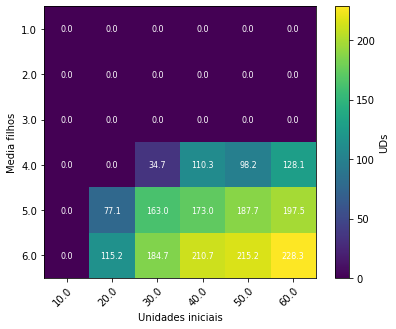

In [4]:
#Heatmap. 
#Get the vales from the document.
alive_values = np.array([[entry['alive'] for entry in row] for row in mM_datos])
fig,ax = plt.subplots(1,1, figsize=(7, 5), facecolor="white")
IM = ax.imshow(alive_values)
cbar = fig.colorbar(IM, ax=ax, label="UDs")
ax.set_xticks(np.arange(len(mbetas)))
ax.set_yticks(np.arange(len(malphas)))
ax.set_xticklabels(mbetas)
ax.set_yticklabels(malphas)
#Size
for i in range(len(malphas)):
    for j in range(len(mbetas)):
        ax.text(j, i, f'{alive_values[i, j]:.1f}', ha="center", va="center", color="w", fontsize=8)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
ax.set_ylabel("Media filhos")
ax.set_xlabel("Unidades iniciais")

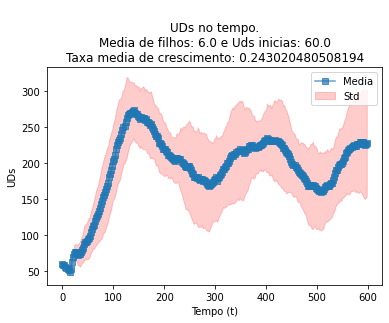

In [7]:
#Graph of experiment with mean and std
x = 5
y = 5

# Main line
plt.plot(mM_behavior[y][x]['tempo'], mM_behavior[y][x]['mean'], 's-', label='Media', alpha=0.7)

# Std
plt.fill_between(mM_behavior[y][x]['tempo'], mM_behavior[y][x]['mean'] - mM_behavior[y][x]['std'],
                 mM_behavior[y][x]['mean'] + mM_behavior[y][x]['std'], color='red', alpha=0.2, label='Std')

plt.xlabel('Tempo (t)')
plt.ylabel('UDs')
plt.title(f'''
UDs no tempo.
Media de filhos: {malphas[y]} e Uds inicias: {mbetas[x]}
Taxa media de crescimento: {mM_behavior[y][x]['growth rate']}''')
plt.legend()
plt.show()

# Experiment of children and beta.
UDs iniciais 30

In [39]:
#This experiment has Uds inicias in 30
iniciais = 40
n = 7
ualphas = np.linspace(1,n,n) # Average number of children: from 1 to n
ubetas = np.arange(0.045, 0.07 + 0.005, 0.005) # Beta from 0.045 to 0.075
uM = np.empty((len(ualphas), len(ubetas)), dtype=object)
punto_vista = 2
tiempo = 600
tempo = list(range(0,tiempo,punto_vista))
experiments = 10

start = time.time()
# For data of behaviour
datos_2 = np.empty((len(ualphas), len(ubetas)), dtype=object)
print(uM.shape)

for i, media in enumerate(ualphas):
    for j, prob_morte  in enumerate(ubetas):
        list_alive_UDs = []
        list_vivas_puntos_vista = []
        tasas_crecimiento = []
        star_configuration = time.time()
        original_media = media
        for experiment in range(1, experiments+1):
            #### Initialization
            ## Comunidades
            UD.uds = {}
            comunidades_disponibles = [i for i in range(1, (int(iniciais) // 10) + 1) for _ in range(10)]
            instancias_ud = []
            for id_ud in range(1, int(iniciais) + 1):
                instancias_ud.append(UD(id_ud, media, comunidades_disponibles.pop(0)))
            ## Variedades y repartirlas entre las comunidades
            for id_ud, ud in UD.uds.items():
                for _ in range(5):
                    ud.varieties.append(Variety())
            # Lists for graphs
            vivas_puntos_vista = [int(iniciais)]
            vivas_tasa_crecimiento = [int(iniciais)]
            mortas_puntos_vista = [0]
            # Simulation
            for t in range(1, tiempo):
                uds_copy = dict(UD.uds)
                any_ud_active = False
                alive = len([1 for id, ud in uds_copy.items() if ud.activa])
                if alive > 200 and (media == original_media): #or media == original_media-1):
                    media -= media//2
                    if media >= 4:
                        media = media //2
                    print(media)
                elif alive < 150 and media < original_media:
                    media = original_media
                    print(media)  
                for id_ud, ud in uds_copy.items():
                    if ud.activa == True:
                        any_ud_active = True
                        ud.ter_filho()
                        ud.buscar_ud(int(media),0, True)
                        ud.incrementar_idade()
                        ud.death_probability(prob_morte)
                if not any_ud_active:
                    # Only 0
                    #print(f"acabó en el experimento {experiment} de la media {malphas[i]} con unidades {mbetas[j]}")
                    vivas_puntos_vista.extend([0] * (int((tiempo/punto_vista)-(len(vivas_puntos_vista)))))
                    vivas_tasa_crecimiento.extend([0] * (int((tiempo)-(len(vivas_tasa_crecimiento)))))
                    #mortas_puntos_vista.extend([unidades_iniciais] * (tiempo - t))
                    break
                # Collecting data
                vivas_tasa_crecimiento.append(len([ud for id, ud in uds_copy.items() if ud.activa]))
                if t % punto_vista == 0:
                    viv = len([ud for id, ud in uds_copy.items() if ud.activa])
                    #mort = len([ud for id, ud in uds_copy.items() if not ud.activa])
                    vivas_puntos_vista.append(viv)
#                     mortas_puntos_vista.append(mort)
            # Average Annual Population Growth
            indice_primer_cero = np.where(np.array(vivas_tasa_crecimiento) == 0)[0]
            if len(indice_primer_cero) > 0:
                # Only before 0
                tasas_crecimiento.append(np.diff(vivas_tasa_crecimiento[:indice_primer_cero[0] - 1]) / vivas_tasa_crecimiento[:-1][:indice_primer_cero[0] - 2] * 100)
            else:
                tasas_crecimiento.append(np.diff(vivas_tasa_crecimiento) / vivas_tasa_crecimiento[:-1] * 100)
            # Collect the data
            list_alive_UDs.append(len([ud for id, ud in uds_copy.items() if ud.activa == True])) #For heatmap
            list_vivas_puntos_vista.append(vivas_puntos_vista)
            #print(f"""
            #    Acabó la simulacion con media de {int(media)} y {int(iniciais)} unidades iniciales. Prob de morte: {prob_morte}
            #    poblacion total al final de la simulación: {len([ud for id, ud in uds_copy.items() if ud.activa == True])}""")
        media = original_media
        end_config = time.time()
        uM[i][j] = {'alive': np.mean(list_alive_UDs),
                    'std': np.std(list_alive_UDs),
                    'time used': end_config - star_configuration}
        datos_2[i][j] = {'tempo': tempo, 
                         'mean': np.mean(list_vivas_puntos_vista, axis=0), 
                         'std':  np.std(list_vivas_puntos_vista, axis=0),
                         'growth rate': np.mean([np.mean(lista) for lista in tasas_crecimiento])}
        print(f"""
The total time of the configuration of mean {original_media} and beta {prob_morte:.3f} is  {end_config - star_configuration}
        """)
# Folders and save
folder_name = 'resultados_parametros_locality_controlpop'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
# Heatmap and std
heat_std = os.path.join(folder_name, 'filhos_morte_locality_controlpop.npy')
np.save(heat_std, uM)
# Behavior of experiments
behavior = os.path.join(folder_name, 'filhos_morte_datos_locality_controlpop.npy')
np.save(behavior, datos_2)
now = datetime.now()
finish = time.time()
print(f"""
It finished at: {now}
It lasted {finish-start}
""")
print("done")

(7, 7)

The total time of the configuration of mean 1.0 and beta 0.045 is  0.2336876392364502
        

The total time of the configuration of mean 1.0 and beta 0.050 is  0.19954323768615723
        

The total time of the configuration of mean 1.0 and beta 0.055 is  0.21339750289916992
        

The total time of the configuration of mean 1.0 and beta 0.060 is  0.14714717864990234
        

The total time of the configuration of mean 1.0 and beta 0.065 is  0.12699341773986816
        

The total time of the configuration of mean 1.0 and beta 0.070 is  0.1494450569152832
        

The total time of the configuration of mean 1.0 and beta 0.075 is  0.11367297172546387
        

The total time of the configuration of mean 2.0 and beta 0.045 is  0.493389368057251
        

The total time of the configuration of mean 2.0 and beta 0.050 is  0.3965799808502197
        

The total time of the configuration of mean 2.0 and beta 0.055 is  0.3491809368133545
        

The total time of the config

In [40]:
# Dowload the documents
#As reference
n = 7
ualphas = np.linspace(1,n,n) # Average number of children: from 1 to n
ubetas = np.arange(0.045, 0.07 + 0.005, 0.005) # Beta from 0.045 to 0.075
#Folders
folder_name = 'resultados_parametros_locality_controlpop'
heat_std = os.path.join(folder_name, 'filhos_morte_locality_controlpop.npy')
behavior = os.path.join(folder_name, 'filhos_morte_datos_locality_controlpop.npy')
## heatmap and mean
uM_datos = np.load(heat_std, allow_pickle=True)
## behavior for experiments
uM_behavior = np.load(behavior, allow_pickle=True)

Text(0.5, 0, 'Beta')

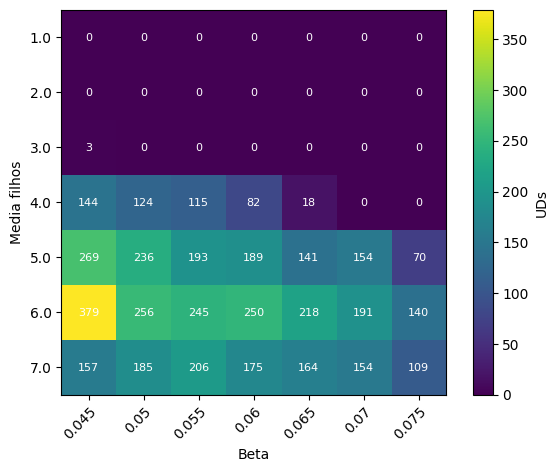

In [41]:
#Heatmap. 
alive_values = np.array([[entry['alive'] for entry in row] for row in uM_datos])
fig,ax = plt.subplots(1,1, figsize=(7, 5), facecolor="white")
IM = ax.imshow(alive_values)
cbar = fig.colorbar(IM, ax=ax, label="UDs")
ax.set_xticks(np.arange(len(ubetas)))
ax.set_yticks(np.arange(len(ualphas)))
ax.set_xticklabels([f'{round(beta, 3)}' for beta in ubetas])
ax.set_yticklabels([f'{alpha:.1f}' for alpha in ualphas])
# Size
for i in range(len(ualphas)):
    for j in range(len(ubetas)):
        ax.text(j, i, f'{alive_values[i, j]:.0f}', ha="center", va="center", color="w", fontsize=8)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
ax.set_ylabel("Media filhos")
ax.set_xlabel("Beta")

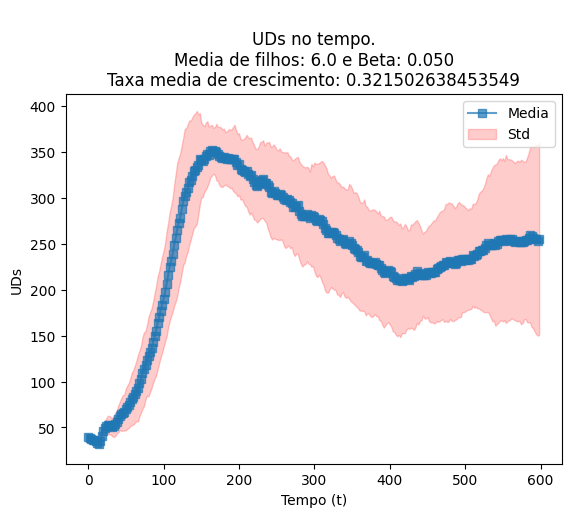

In [70]:
#Graph for each experiment
x = 1
y = 5

# Mean line
plt.plot(uM_behavior[y][x]['tempo'], uM_behavior[y][x]['mean'], 's-', label='Media', alpha=0.7)

# Std
plt.fill_between(uM_behavior[y][x]['tempo'], uM_behavior[y][x]['mean'] - uM_behavior[y][x]['std'],
                 uM_behavior[y][x]['mean'] + uM_behavior[y][x]['std'], color='red', alpha=0.2, label='Std')

plt.xlabel('Tempo (t)')
plt.ylabel('UDs')
plt.title(f'''
UDs no tempo.
Media de filhos: {ualphas[y]} e Beta: {ubetas[x]:.3f}
Taxa media de crescimento: {uM_behavior[y][x]['growth rate']}''')
plt.legend()
plt.show()

## Experiment with initial UDs and Beta

### Mean of children (4)

In [42]:
#This experiment has mean of children: 4
media = 4
n = 70
halphas = np.linspace(10,n,int(n/10)) # Unidades inicias from 10 to 50
hbetas = np.arange(0.05, 0.07 + 0.005, 0.005) # Beta from 0.045 to 0.075
hM = np.empty((len(halphas), len(hbetas)), dtype=object)
punto_vista = 2
tiempo = 600
tempo = list(range(0,tiempo,punto_vista))
experiments = 10

start = time.time()
# For data of behaviour
datos_3 = np.empty((len(halphas), len(hbetas)), dtype=object)
print(uM.shape)

for i, iniciais in enumerate(halphas):
    for j, prob_morte  in enumerate(hbetas):
        list_alive_UDs = []
        list_vivas_puntos_vista = []
        tasas_crecimiento = []
        star_configuration = time.time()
        original_media = media
        for experiment in range(1, experiments+1):
            #### Initialization
            ## Comunidades
            UD.uds = {}
            comunidades_disponibles = [i for i in range(1, (int(iniciais) // 10) + 1) for _ in range(10)]
            instancias_ud = []
            for id_ud in range(1, int(iniciais) + 1):
                instancias_ud.append(UD(id_ud, media, comunidades_disponibles.pop(0)))
            ## Variedades y repartirlas entre las comunidades
            for id_ud, ud in UD.uds.items():
                for _ in range(5):
                    ud.varieties.append(Variety())
            # Lists for graphs
            vivas_puntos_vista = [int(iniciais)]
            vivas_tasa_crecimiento = [int(iniciais)]
            mortas_puntos_vista = [0]
            # Simulation
            for t in range(1, tiempo):
                uds_copy = dict(UD.uds)
                any_ud_active = False
                alive = len([1 for id, ud in uds_copy.items() if ud.activa])
                if alive > 200 and (media == original_media): #or media == original_media-1):
                    media -= media//2
                    if media >= 4:
                        media = media //2
                    print(media)
                elif alive < 150 and media < original_media:
                    media = original_media
                    print(media)  
                for id_ud, ud in uds_copy.items():
                    if ud.activa == True:
                        any_ud_active = True
                        ud.ter_filho()
                        ud.buscar_ud(int(media),0, True)
                        ud.incrementar_idade()
                        ud.death_probability(prob_morte)
                if not any_ud_active:
                    # Only 0
                    #print(f"acabó en el experimento {experiment} de la media {malphas[i]} con unidades {mbetas[j]}")
                    vivas_puntos_vista.extend([0] * (int((tiempo/punto_vista)-(len(vivas_puntos_vista)))))
                    vivas_tasa_crecimiento.extend([0] * (int((tiempo)-(len(vivas_tasa_crecimiento)))))
                    #mortas_puntos_vista.extend([unidades_iniciais] * (tiempo - t))
                    break
                # Collecting data
                vivas_tasa_crecimiento.append(len([ud for id, ud in uds_copy.items() if ud.activa]))
                if t % punto_vista == 0:
                    viv = len([ud for id, ud in uds_copy.items() if ud.activa])
                    #mort = len([ud for id, ud in uds_copy.items() if not ud.activa])
                    vivas_puntos_vista.append(viv)
#                     mortas_puntos_vista.append(mort)
            # Average Annual Population Growth
            indice_primer_cero = np.where(np.array(vivas_tasa_crecimiento) == 0)[0]
            if len(indice_primer_cero) > 0:
                # Only before 0
                tasas_crecimiento.append(np.diff(vivas_tasa_crecimiento[:indice_primer_cero[0] - 1]) / vivas_tasa_crecimiento[:-1][:indice_primer_cero[0] - 2] * 100)
            else:
                tasas_crecimiento.append(np.diff(vivas_tasa_crecimiento) / vivas_tasa_crecimiento[:-1] * 100)
            # Collect the data
            list_alive_UDs.append(len([ud for id, ud in uds_copy.items() if ud.activa == True])) #For heatmap
            list_vivas_puntos_vista.append(vivas_puntos_vista)
            #print(f"""
            #    Acabó la simulacion con media de {int(media)} y {int(iniciais)} unidades iniciales. Prob de morte: {prob_morte}
            #    poblacion total al final de la simulación: {len([ud for id, ud in uds_copy.items() if ud.activa == True])}""")
        media = original_media
        end_config = time.time()
        hM[i][j] = {'alive': np.mean(list_alive_UDs),
                    'std': np.std(list_alive_UDs),
                    'time used': end_config - star_configuration}
        datos_3[i][j] = {'tempo': tempo, 
                         'mean': np.mean(list_vivas_puntos_vista, axis=0), 
                         'std':  np.std(list_vivas_puntos_vista, axis=0),
                         'growth rate': np.mean([np.mean(lista) for lista in tasas_crecimiento])}
        print(f"""
The total time of the configuration of Initial UDs {iniciais} and beta {prob_morte:.3f} is: {end_config - star_configuration}
        """)
# Folders and save
folder_name = 'resultados_parametros_locality_controlpop'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
# Heatmap and std
heat_std = os.path.join(folder_name, 'morte_unidadesiniciais_locality_controlpop.npy')
np.save(heat_std, hM)
# Behavior of experiments
behavior = os.path.join(folder_name, 'morte_unidadesiniciais_datos_locality_controlpop.npy')
np.save(behavior, datos_3)
now = datetime.now()
finish = time.time()
print(f"""
It finished at: {now}
It lasted {finish-start}
""")
print("done")

(7, 7)

The total time of the configuration of Initial UDs 10.0 and beta 0.050 is: 0.05587339401245117
        

The total time of the configuration of Initial UDs 10.0 and beta 0.055 is: 0.04902935028076172
        

The total time of the configuration of Initial UDs 10.0 and beta 0.060 is: 0.040399789810180664
        

The total time of the configuration of Initial UDs 10.0 and beta 0.065 is: 0.03896737098693848
        

The total time of the configuration of Initial UDs 10.0 and beta 0.070 is: 0.03457474708557129
        

The total time of the configuration of Initial UDs 10.0 and beta 0.075 is: 0.029233455657958984
        
2
4

The total time of the configuration of Initial UDs 20.0 and beta 0.050 is: 4.559455394744873
        

The total time of the configuration of Initial UDs 20.0 and beta 0.055 is: 1.5377583503723145
        

The total time of the configuration of Initial UDs 20.0 and beta 0.060 is: 0.5641319751739502
        

The total time of the configuration of Initia

In [43]:
# Dowload the documents
#As reference
n = 70
halphas = np.linspace(10,n,int(n/10)) # Unidades inicias from 10 to 50
hbetas = np.arange(0.05, 0.07 + 0.005, 0.005) # Beta from 0.045 to 0.075
#Folders
folder_name = 'resultados_parametros_locality_controlpop'
heat_std = os.path.join(folder_name, 'morte_unidadesiniciais_locality_controlpop.npy')
behavior = os.path.join(folder_name, 'morte_unidadesiniciais_datos_locality_controlpop.npy')
## heatmap and mean
hM_datos = np.load(heat_std, allow_pickle=True)
## behavior for experiments
hM_behavior = np.load(behavior, allow_pickle=True)

Text(0.5, 0, 'Beta')

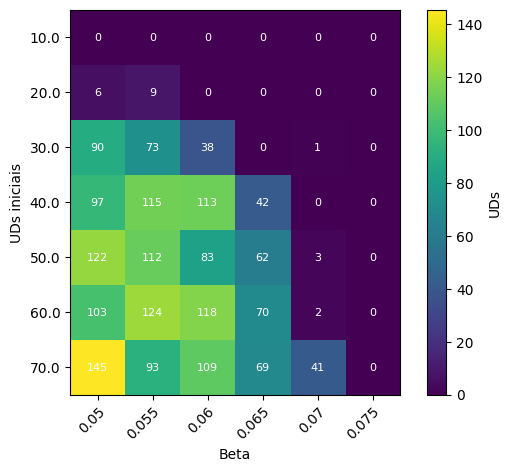

In [44]:
#Heatmap. 
alive_values = np.array([[entry['alive'] for entry in row] for row in hM_datos])
fig,ax = plt.subplots(1,1, figsize=(7, 5), facecolor="white")
IM = ax.imshow(alive_values)
cbar = fig.colorbar(IM, ax=ax, label="UDs")
ax.set_xticks(np.arange(len(hbetas)))
ax.set_yticks(np.arange(len(halphas)))
ax.set_xticklabels([f'{round(beta, 3)}' for beta in hbetas])
ax.set_yticklabels([f'{alpha:.1f}' for alpha in halphas])
for i in range(len(halphas)):
    for j in range(len(hbetas)):
        ax.text(j, i, f'{alive_values[i, j]:.0f}', ha="center", va="center", color="w", fontsize=8)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
ax.set_ylabel("UDs iniciais")
ax.set_xlabel("Beta")

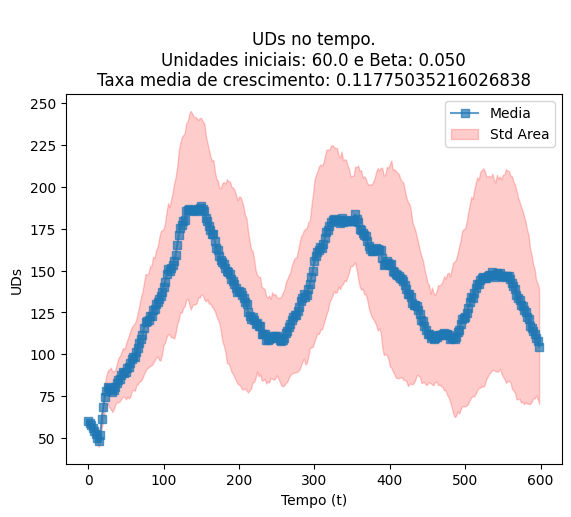

In [54]:
x = 0
y = 5

# MEan line
plt.plot(hM_behavior[y][x]['tempo'], hM_behavior[y][x]['mean'], 's-', label='Media', alpha=0.7)

# Std
plt.fill_between(hM_behavior[y][x]['tempo'], hM_behavior[y][x]['mean'] - hM_behavior[y][x]['std'],
                 hM_behavior[y][x]['mean'] + hM_behavior[y][x]['std'], color='red', alpha=0.2, label='Std Area')

plt.xlabel('Tempo (t)')
plt.ylabel('UDs')
plt.title(f'''
UDs no tempo.
Unidades iniciais: {halphas[y]} e Beta: {hbetas[x]:.3f}
Taxa media de crescimento: {hM_behavior[y][x]['growth rate']}''')
plt.legend()
plt.show()